In [1]:
# conda list --export > requirements_conda.txt

In [21]:
from tools.dset_getters import cvsi_dset, me_dset
#TODO uninstall torchtext after check
# train_iter = AG_NEWS(split='test')
# train_iter = AmazonReviewFull(split='test')
# train_iter = SogouNews(split='test')
# dset = to_map_style_dataset(train_iter)

# print(dset)
# print(type(dset))
# print(dset.__getitem__(0))

#TODO withbiopython - dont create dsets from scratch always??
# dset = cvsi_dset('train', force_download=False)


dset = me_dset('train', force_download=False)
 
print(dset)
print(type(dset))

print(dset.__getitem__(100))


Reference fasta_cache/Mus_musculus.GRCm38.dna_rm.toplevel.fa.gz already exists. Skipping.


/home/martinekvlastimil95/repos/genomic_benchmarks/tools/loc2seq/with_biopython.py:77: UserWarning: No version specified. Using version 0.
  warnings.warn(f"No version specified. Using version {metadata['version']}.")


  0%|          | 0/21 [00:00<?, ?it/s]

<class 'tools.dset_getters.me_dset'>
('AGGGGTCGGGTCAGTTTCTGGAAAGTGACCTCCTCTGTAGTGGAGTGGGCATGGTTCCGTGTAGGCAAGGAATAGTAGACCTCACTCAACTCCAGGTGCAGCGAGGACTGAATGCGAGGTGGAGTGAGCGCGGGCCGAAGTGTAGATGCAGGATAGTGAGTGATCTGGAAGGCAGGCGGGCGGGTGGATGGTTGGAGGGAGCATCCCTCGTGGGAGGGGGCAACTCTAAAAAGGCTCCGATGCTGGAAAGGCTCTGGCTCTGCTCCTGCCCGGGGTCCCTTCTCATTGGAGGCTGGAAATCGCTGCATTTTAATCCCTCCAACTGAGGCCTGGGTGGTTCTTTGTTCAGTGGAGGCTGCCTTCCTGCGCTCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCACGGCCTTGATGCTTAATAAAAAGTACAAGTTGTCGGGAATTAGATTTTCCTAGGTCGCCAGCAGTGCACAGATACCAACTTAATGAGAAAAACATCTAGTGAGTTTGGGATGTGTTTCACATTTCNNNNNNNNGGCATCAAAACGGTAATCATGGTGTGTGTCCA', 0)


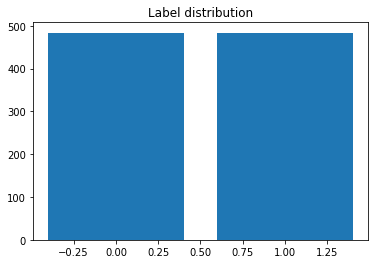

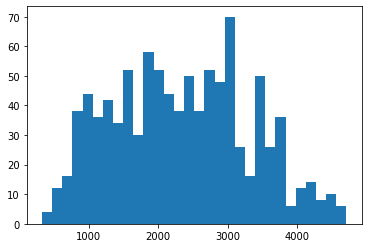

In [26]:
from matplotlib import pyplot as plt

label_counts = {}
lengths = []
for i in range(dset.__len__()):
    x,y = dset.__getitem__(i)
    if(y not in label_counts.keys()):
        label_counts[y] = 1
    else:
        label_counts[y]+=1
    lengths.append(len(x))

plt.figure()
plt.bar(label_counts.keys(), label_counts.values())
plt.title('Label distribution')
plt.figure()
plt.hist(lengths, bins=30)
plt.title('Sequence length distribution')

pass


In [2]:
from pathlib import Path
import tarfile
import os.path
from tools.data_utils import untar_file, download_tarfile

def make_tarfile(output_filename, source_dir):
    print('making')
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

# path = Path('./datasets')
# for sub in list(path.iterdir())[1:]:
    # print(sub)
    # make_tarfile(sub.stem+'.tar.gz', sub)


file_name = './datasets/D_demo_coding_vs_intergenomic_seqs.tar.gz'

url = 'https://github.com/ML-Bioinfo-CEITEC/genomic_benchmarks/blob/main/datasets/demo_coding_vs_intergenomic_seqs.tar.gz'
download_tarfile(url, file_name)
untar_file(file_name, './datasets')



extracting


In [1]:
from tools.dset_getters import cvsi_dset
from pathlib import Path
import tarfile
import os.path
from tools.data_utils import untar_file, download_tarfile

# file_name = './datasets/demo_coding_vs_intergenomic_seqs.tar.gz'
# url = 'https://github.com/ML-Bioinfo-CEITEC/genomic_benchmarks/raw/main/datasets/demo_coding_vs_intergenomic_seqs.tar.gz'
# download_tarfile(url, file_name)
# untar_file(file_name, './datasets')


dset = cvsi_dset('train', force_download=False)

print(dset)
print(type(dset))

print(dset.__getitem__(100))

Reference datasets/fasta/Homo_sapiens.GRCh38.dna.toplevel.fa.gz already exists. Skipping.
Reference datasets/fasta/Homo_sapiens.GRCh38.cdna.all.fa.gz already exists. Skipping.


/home/martinekvlastimil95/repos/genomic_benchmarks/tools/loc2seq/with_biopython.py:77: UserWarning: No version specified. Using version 0.
  warnings.warn(f"No version specified. Using version {metadata['version']}.")


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/190000 [00:00<?, ?it/s]

<class 'tools.dset_getters.cvsi_dset'>
('CTGCTAGTCATCAAGGTAGAACAGACTCTCCGGGAGCCCATGTTCTACTTCCTGGCCATTCTTTCCACTATTGATTTGGCCCTTTCTACAACCTCTGTGCCTCGCATGCTGGGTATCTTCTGGTTTGATGCTCACGAGATTAACTATGGAGCTTGTGTGGCCCAGATGTTTCTGATCCATGCCTTCACTGGCATGGAGGC', 0)
